<a href="https://colab.research.google.com/github/ChideraFrancisca/LOAN_STATUS-/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
test = pd.read_csv('test.csv')
Train = pd.read_csv('train.csv')

In [141]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [142]:
test.shape

(367, 12)

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [144]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [145]:
Train.shape

(614, 13)

In [146]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [147]:
df = pd.concat([Train, test])

In [148]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [149]:
df.shape

(981, 13)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [151]:
df.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [152]:
df.dropna(axis =0, inplace=True)
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [153]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,332
N,148


In [154]:
df['Gender'].value_counts()

,count
Gender,
Male,394
Female,86


In [155]:
df['Married'].value_counts()

,count
Married,
Yes,311
No,169


In [156]:
df['Education'].value_counts()

,count
Education,
Graduate,383
Not Graduate,97


In [157]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,414
Yes,66


In [158]:
df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


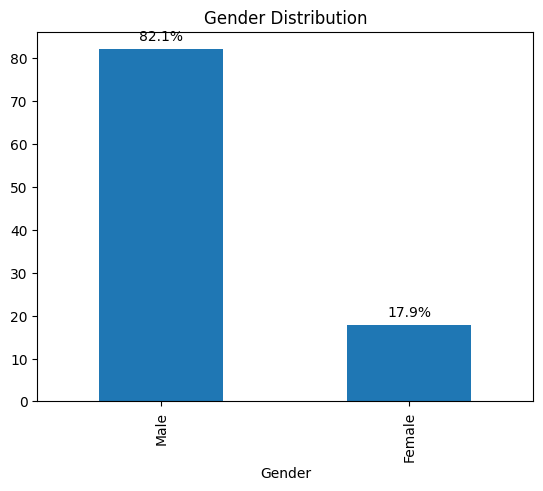

In [159]:
Genderdistribution = df['Gender'].value_counts(normalize=True)*100
ax =Genderdistribution.plot(kind='bar')

plt.title('Gender Distribution')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

**Changing cartegorical variables to numerical variables**

In [160]:
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [161]:
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        # Use the length of unique values to create the replacement list.
        df[i].replace(uniques_value, list(range(len(uniques_value))), inplace=True)

# You no longer need this loop since the above loop handles all columns dynamically.
# for i in ['Property_Area']:
#     uniques_value = df[i].unique()
#     df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [162]:
c_variables = ['Gender', 'Married', 'Education', 'Property_Area','Self_Employed', 'Loan_Status']

cat_to_num(df, c_variables)

In [163]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


**NOTE: AFTER CONVERTING THE CARTEGORICAL VARIABLES TO NUMERICAL VARIABLES, CARTEGORIES WITH 2 VARIABLES CHANGED TO 0 AND 1, WHILE CATEGORIES WITH 3 VARIABLES CHANGED TO 0,1 AND 2.**

*   FOR GENDER : MALE =0, FEMALE=1
*   FOR MARITAL STATUS : MARRIED =0, SINGLE =1
*   FOR EDUCATION : GRADUATE=0, NON-GRADUATE=1
*   FOR PROPERTY AREA : SEMIURBAN=2, URBAN =1, RURAL=0
*   FOR SELF EMPLOYMENT STATUS : NO=0,YES =1
*   FOR LOAN STATUS : YES =1, NO=0








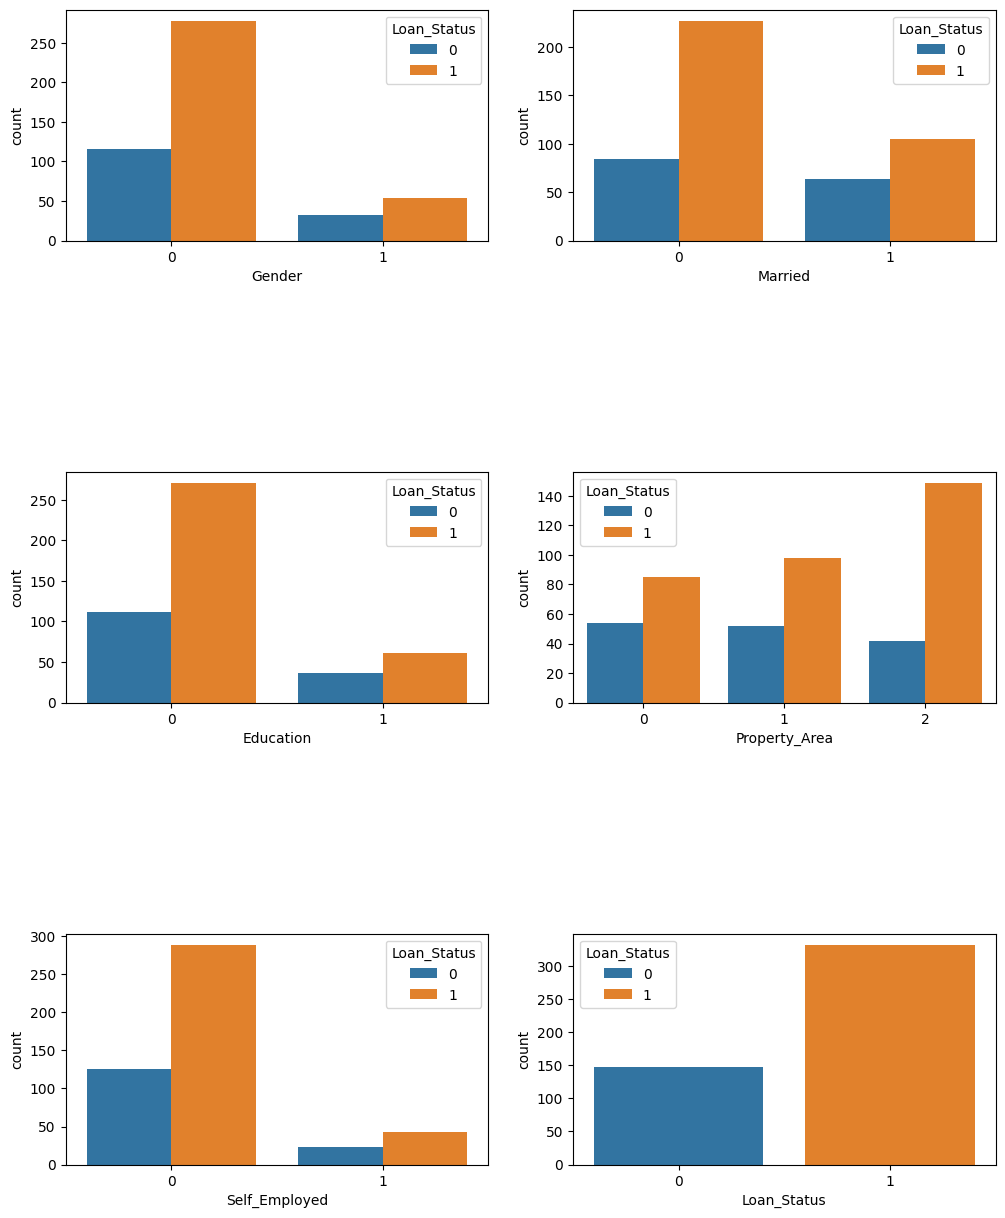

In [164]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col])

plt.subplots_adjust(hspace=1)

In [165]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1) # Remove the extra brackets around 'Loan_ID' so that both labels are passed as a single list.
y = df['Loan_Status']

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Convert '3+' to 3 in the Dependents column
X_train['Dependents'] = X_train['Dependents'].replace('3+', '3').astype(float)
X_test['Dependents'] = X_test['Dependents'].replace('3+', '3').astype(float)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [169]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)


In [170]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [171]:
y_pred = model.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 82.29%
Roc Score: 69.64%


In [173]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,11,17,28
1,0,68,68
All,11,85,96
